# Classification models and NLP in R
***This is the follow-up notebook, in which we're going to perform classification on the dataset we constructed in the previous notebook.***

In [1]:
library(caret)
install.packages('e1071', dependencies = TRUE)
install.packages('kernlab', dependencies = TRUE)

X_train <- read.csv('/kaggle/input/news-datasets/xtrain.csv', header = TRUE)
X_train <- data.frame(X_train)

X_test <- read.csv('/kaggle/input/news-datasets/xtest.csv', header = TRUE)
X_test <- data.frame(X_test)

y_train <- read.csv('/kaggle/input/news-datasets/ytrain.csv', header = TRUE)
y_train <- data.frame(y_train)

y_test <- read.csv('/kaggle/input/news-datasets/ytest.csv', header = TRUE)
y_test <- data.frame(y_test)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
head(X_train)

,X,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,35641,0,1,0,1,24,17,3,0,150,2571,23
2,43780,0,0,0,0,4,6,0,0,80,959,12
3,19131,0,0,0,0,5,6,0,0,79,822,13
4,30005,0,0,1,0,25,36,1,1,80,2628,11
5,13663,0,1,0,0,32,45,0,0,72,3441,11
6,33686,0,0,0,0,27,19,0,0,106,2721,12


In [3]:
class(X_train)

[1] "data.frame"

In [4]:
head(y_test)

,X,is_fake
,<int>,<int>
1,34059,1
2,10347,0
3,25271,1
4,1750,0
5,29550,1
6,39599,1


In [5]:
class(y_test)

[1] "data.frame"

In [6]:
head(X_test)

,X,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,34059,0,2,0,0,51,42,3,0,125,4473,17
2,10347,0,0,0,0,4,2,0,0,56,518,9
3,25271,0,0,0,0,12,16,1,1,103,1877,17
4,1750,2,1,0,0,23,23,0,0,68,3595,8
5,29550,0,1,0,0,19,21,2,0,81,2615,13
6,39599,0,0,0,1,13,21,0,0,135,2143,18


In [7]:
head(y_train)

,X,is_fake
,<int>,<int>
1,35641,1
2,43780,1
3,19131,0
4,30005,1
5,13663,0
6,33686,1


In [8]:
train <- merge(X_train, y_train)
row.names(train) <- train$X
train <- train[-1]
train$is_fake <- as.factor(train$is_fake)
head(train)

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words,is_fake
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,2,1,0,0,49,54,0,0,64,4659,10,0
1,2,0,0,0,37,29,0,0,64,4077,9,0
2,3,0,0,0,22,19,0,0,60,2789,10,0
4,0,0,0,0,58,51,1,1,69,5204,11,0
5,0,2,0,0,36,31,0,0,64,3707,9,0
7,0,1,0,0,12,9,1,2,60,856,10,0


In [9]:
test <- merge(X_test, y_test)
row.names(test) <- test$X
test = test[-1]
test$is_fake <- as.factor(test$is_fake)
head(test)

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words,is_fake
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
3,0,0,0,0,21,23,0,0,59,2461,9,0
6,0,1,0,0,36,22,0,0,63,3220,11,0
11,0,0,0,0,37,34,0,0,73,3829,10,0
31,0,0,0,0,14,15,0,0,53,1375,8,0
33,0,0,0,0,22,16,0,0,68,2039,10,0
36,0,1,0,0,33,27,0,0,67,3423,10,0


In [10]:
summary(train)

   peri_title       comm_title       ques_title        excl_title     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.2742   Mean   :0.2248   Mean   :0.04198   Mean   :0.08185  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :6.0000   Max.   :5.0000   Max.   :3.00000   Max.   :4.00000  
   peri_text        comm_text        ques_text       excl_text       
 Min.   :  0.00   Min.   :  0.00   Min.   : 0.00   Min.   :  0.0000  
 1st Qu.: 10.00   1st Qu.:  8.00   1st Qu.: 0.00   1st Qu.:  0.0000  
 Median : 18.00   Median : 17.00   Median : 0.00   Median :  0.0000  
 Mean   : 20.95   Mean   : 20.24   Mean   : 0.68   Mean   :  0.4075  
 3rd Qu.: 27.00   3rd Qu.: 26.00   3rd Qu.: 1.00   3rd Qu.:  0.0000  
 Max.   :555.00   Max.   :518.00   Max.   :94.00   Max.   :133.0000  
  title_lengt

In [11]:
sapply(train, class)

peri_title   comm_title   ques_title   excl_title    peri_text    comm_text 
   "integer"    "integer"    "integer"    "integer"    "integer"    "integer" 
   ques_text    excl_text title_length  text_length  title_words      is_fake 
   "integer"    "integer"    "integer"    "integer"    "integer"     "factor"

In [13]:
validation_index <- createDataPartition(train$is_fake, p = 0.80, list = FALSE)
validation <- train[-validation_index,]
train <- train[validation_index,]

In [14]:
control <- trainControl(method = 'cv', number = 10)
metric <- 'Accuracy'

***The datasets are imported successfully.***
## LDA, CART, KNN, SVM, RF

In [15]:
fit.lda <- train(is_fake~., data = train, method = 'lda', metric = metric, trControl = control)

fit.cart <- train(is_fake~., data = train, method = 'rpart', metric = metric, trControl = control)

fit.knn <- train(is_fake~., data = train, method = 'knn', metric = metric, trControl = control)

fit.svm <- train(is_fake~., data = train, method = 'svmRadial', metric = metric, trControl = control)

fit.rf <- train(is_fake~., data = train, method = 'rf', metric = metric, trControl = control)

In [16]:
results <- resamples(list(lda = fit.lda, cart = fit.cart, knn = fit.knn, svm = fit.svm, rf = fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.8534145 0.8660937 0.8695085 0.8694580 0.8731919 0.8830435    0
cart 0.8460200 0.8545950 0.8588506 0.8601511 0.8663549 0.8821227    0
knn  0.8412353 0.8449906 0.8486298 0.8500588 0.8511913 0.8651588    0
svm  0.9025663 0.9066885 0.9088735 0.9091301 0.9118192 0.9151805    0
rf   0.9130057 0.9178991 0.9236789 0.9227898 0.9277713 0.9325500    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.7083582 0.7337114 0.7405847 0.7403904 0.7478742 0.7672937    0
cart 0.6911675 0.7084267 0.7169171 0.7194798 0.7318120 0.7634893    0
knn  0.6838074 0.6912106 0.6984303 0.7012161 0.7034689 0.7311720    0
svm  0.8054015 0.8135737 0.8179145 0.8184178 0.8238295 0.8305602    0
rf   0.8260077 0.8355419 0.8471762 0.8454156 0.8553353 0.8649509    0


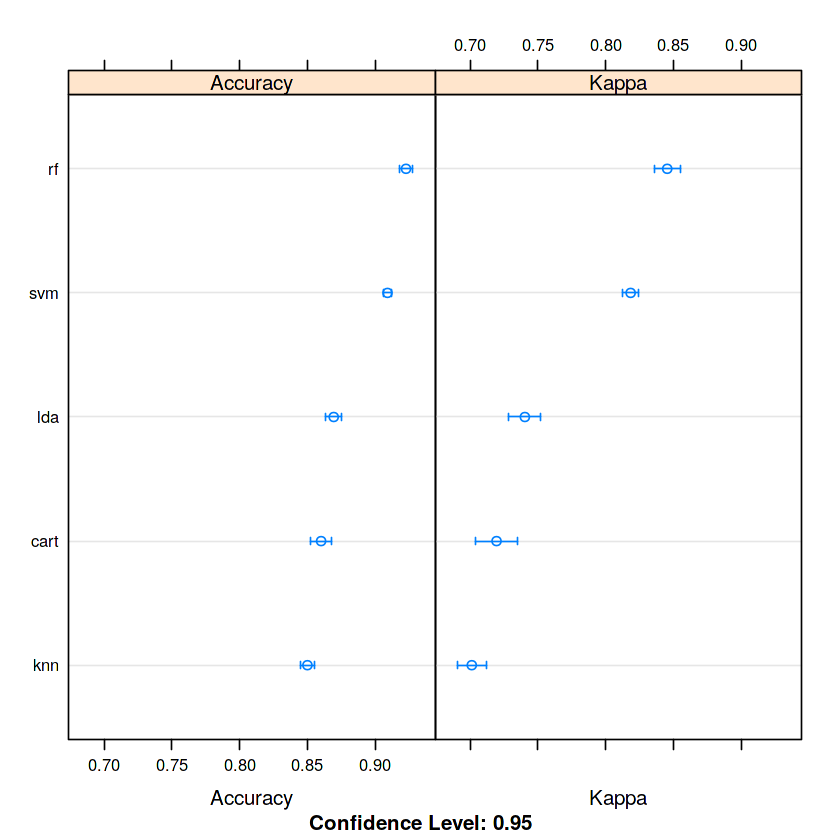

In [17]:
dotplot(results)

***It appears Random Forests have the highest accuracy of all five algorithms, placed at ~92.5%. Let's make predictions on the test set using that model.***

In [18]:
print(fit.rf)

Random Forest 

22989 samples
   11 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 20690, 20690, 20691, 20690, 20691, 20690, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9183961  0.8368339
   6    0.9227898  0.8454156
  11    0.9200930  0.8400028

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.


In [22]:
predictions <- predict(fit.rf, validation)
confusionMatrix(predictions, validation$is_fake)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2534  251
         1  204 2757
                                          
               Accuracy : 0.9208          
                 95% CI : (0.9135, 0.9277)
    No Information Rate : 0.5235          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8414          
                                          
 Mcnemar's Test P-Value : 0.03104         
                                          
            Sensitivity : 0.9255          
            Specificity : 0.9166          
         Pos Pred Value : 0.9099          
         Neg Pred Value : 0.9311          
             Prevalence : 0.4765          
         Detection Rate : 0.4410          
   Detection Prevalence : 0.4847          
      Balanced Accuracy : 0.9210          
                                          
       'Positive' Class : 0               
                        

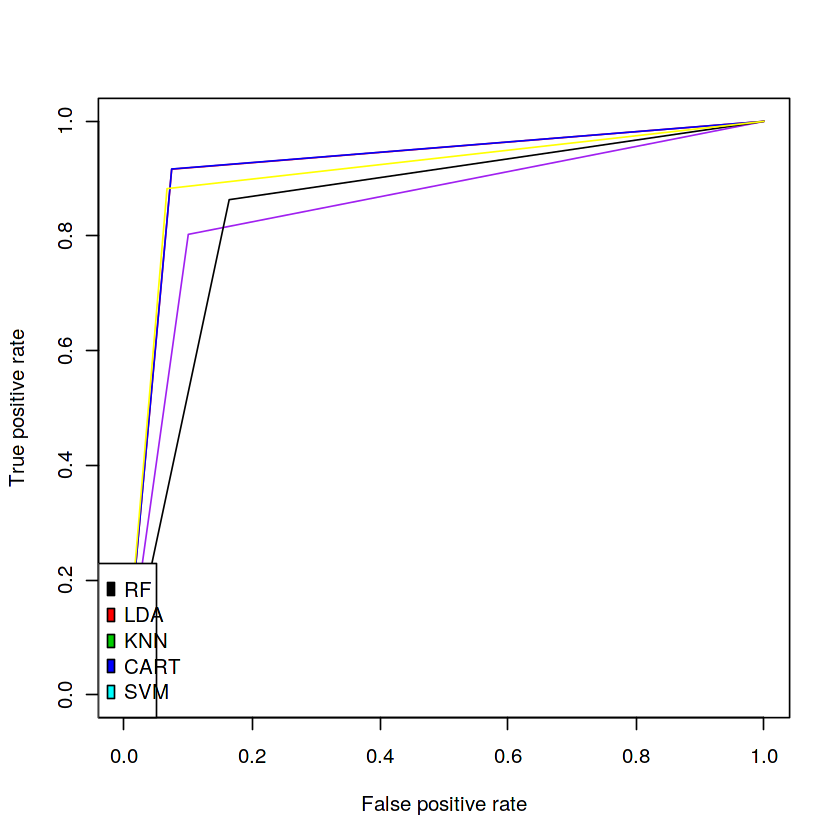

In [39]:
library(ROCR)

colors <- c('black', 'red', 'green', 'blue', 'lightblue')
m <- length(predictions)

# rf predictions
predvec <- ifelse(predictions == '1', 1, 0)
realvec <- ifelse(validation$is_fake == '1', 1, 0)
pred <- prediction(predvec, realvec)
perf <- performance(pred, 'tpr', 'fpr')
plot(perf, col = colors[1])

# lda predictions
lda_predictions <- predict(fit.rf, validation)
lda_predvec <- ifelse(lda_predictions == '1', 1, 0)
lda_pred <- prediction(lda_predvec, realvec)
lda_perf <- performance(lda_pred, 'tpr', 'fpr')
plot(lda_perf, add = TRUE, col = colors[2])

# knn predictions
knn_predictions <- predict(fit.knn, validation)
knn_predvec <- ifelse(knn_predictions == '1', 1, 0)
knn_pred <- prediction(knn_predvec, realvec)
knn_perf <- performance(knn_pred, 'tpr', 'fpr')
plot(knn_perf, add = TRUE, col = colors[3])

# cart predictions
cart_predictions <- predict(fit.cart, validation)
cart_predvec <- ifelse(cart_predictions == '1', 1, 0)
cart_pred <- prediction(cart_predvec, realvec)
cart_perf <- performance(cart_pred, 'tpr', 'fpr')
plot(cart_perf, add = TRUE, col = colors[4])

# svm predictions
svm_predictions <- predict(fit.svm, validation)
svm_predvec <- ifelse(svm_predictions == '1', 1, 0)
svm_pred <- prediction(svm_predvec, realvec)
svm_perf <- performance(svm_pred, 'tpr', 'fpr')
plot(svm_perf, add = TRUE, col = colors[5])

legend(x = 'bottomleft', legend = c('RF', 'LDA', 'KNN', 'CART', 'SVM'), fill = 1:m)

***So, to summarize the work done in the last notebook and this one so far, we engineered our own features from the datasets and managed to attain 92%+ accuracy when classifying. Next, we're going to apply other NLP methods and see if we can get even better results.***